In [ ]:
# "Aplicación Web con DL"
> "por juandrh2.0"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [curso_Fast.ai]
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Lección 03: Herramientas y conceptos fundamentales de deep learning

<a href="https://course.fast.ai/">Practical Deep Learning for Coders</a>


Consejo: ser tenaz, seguir intentándo resolver los problemas. 

## Fundamentos de visión por ordenador

Usaremos el conjunto de datos MNIST, compuesto por digitos escritos a mano. Aprenderemos a crear un sistema que los reconozca.

### Manejo de los datos

In [6]:
# Cargar lo datos
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [7]:
# listar archivos/carpetas de un directorio
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [15]:
# crear dos vectores con los listados de archivos
treses=(path/'train'/'3').ls().sorted()
sietes=(path/'train'/'7').ls().sorted()


(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [12]:
# mostrar una imagen 
img3_path = treses[1]
img3 = Image.open(img3_path)
img3

In [14]:
# pasar la imagen a formato tabla
img3t= tensor(img3)
df = pd.DataFrame (img3t [4:15,:15])
df.style.set_properties (**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254
2,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253
3,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10
4,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0
5,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249
7,0,0,0,0,0,0,0,0,0,0,0,14,101,223,253
8,0,0,0,0,0,0,0,0,0,11,166,239,253,253,253
9,0,0,0,0,0,0,0,0,0,16,248,250,253,253,253


### Primera aproximación

Antes de empezar con modelos más complejos se recomienda:
 - Usar un modelo muy sencillo y fácil de implementar: será mejor que un resultado aleatorio y servirá de base
 - Usar un modelo creado por otra persona con tus datos

Modelo sencillo: Comparar con la media de los 3s y 7s

In [19]:
# creo dos tensores que agrupen todas las imagenes de cada uno
tensores3=[tensor(Image.open(i)) for i in treses]
tensores7=[tensor(Image.open(i)) for i in sietes]
len(tensores3),len(tensores7)

(6131, 6265)

<AxesSubplot:>

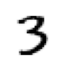

In [22]:
# mostrar una imagen a partir de un tensor
show_image(tensores3[1])

In [23]:
# crear tensores con las imagenes apiladas
pila3s = torch.stack(tensores3).float()/255
pila7s = torch.stack(tensores7).float()/255

In [27]:
# medir dimensiones del tensor 
pila3s.shape

torch.Size([6131, 28, 28])

In [32]:
# dos métodos de medir rango del tensor 
len(pila3s.shape), pila3s.ndim


(3, 3)

In [36]:
# calcular la media de cada uno de la primera dimensión (0)
media3= pila3s.mean(0)
media7= pila7s.mean(0)

<AxesSubplot:>

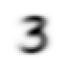

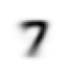

In [40]:
show_image(media3)
show_image(media7)